In [95]:
import pandas as pd
import os
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [11]:
os.chdir('/Users/Weiyang/Desktop/Git/Project')

In [63]:
pd.set_option('display.width', 4000)
pd.set_option('max_colwidth', 4000)
pd.set_option('max_columns', 200)

In [64]:
dataset = pd.read_csv('Ypedia.csv')

## Data Exploratory

In [65]:
dataset.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,1,1,2014-12-15,2014-12-19,2,0,1,8286,1,0,1,0,63,1258,68
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,0,9,2013-03-13,2013-03-14,2,0,1,1842,3,0,1,2,198,786,37
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,1,9,2015-04-03,2015-04-10,2,0,1,8746,1,0,1,6,105,29,22
3,4691082,2013-11-05 10:40:34,11,3,205,411,52752,171.6021,106611,0,0,0,2013-11-07,2013-11-08,2,0,1,6210,3,1,1,2,198,1234,42
4,4878884,2014-06-10 13:34:56,2,3,66,174,50644,NaN,596177,0,0,9,2014-08-03,2014-08-08,2,1,1,12812,5,0,1,2,50,368,83


In [66]:
dataset.describe()

,Unnamed: 0,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,63915.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.882530e+07,9.838570,2.678150,85.995070,308.636990,27676.391240,1960.661721,6.054383e+05,0.133770,0.248140,5.858590,2.020710,0.336750,1.111750,14426.32738,2.577290,0.079930,1.487980,3.150920,81.093290,598.848330,49.860370
std,1.086183e+07,11.996426,0.749018,59.292002,208.706581,16768.647409,2228.153377,3.516154e+05,0.340407,0.431936,3.722823,0.909774,0.734449,0.451602,11036.98122,2.149263,0.271186,1.280262,1.620534,56.111519,510.959297,28.885423
min,1.012000e+03,2.000000,0.000000,0.000000,0.000000,0.000000,0.005600,1.400000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9.448967e+06,2.000000,3.000000,66.000000,174.000000,12949.000000,312.792100,2.987962e+05,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,8267.00000,1.000000,0.000000,1.000000,2.000000,50.000000,158.000000,25.000000
50%,1.881212e+07,2.000000,3.000000,66.000000,314.000000,27655.000000,1131.835300,6.028825e+05,0.000000,0.000000,9.000000,2.000000,0.000000,1.000000,9145.00000,1.000000,0.000000,1.000000,2.000000,50.000000,591.000000,49.000000
75%,2.825307e+07,15.000000,3.000000,70.000000,385.000000,42328.000000,2542.359350,9.157222e+05,0.000000,0.000000,9.000000,2.000000,0.000000,1.000000,18784.00000,5.000000,0.000000,2.000000,4.000000,106.000000,701.000000,73.000000
max,3.767009e+07,53.000000,4.000000,239.000000,1025.000000,56507.000000,11965.376100,1.198783e+06,1.000000,1.000000,10.000000,9.000000,9.000000,8.000000,65035.00000,9.000000,1.000000,120.000000,6.000000,212.000000,2117.000000,99.000000


In [67]:
dataset.dtypes

Unnamed: 0                     int64
date_time                     object
site_name                      int64
posa_continent                 int64
user_location_country          int64
user_location_region           int64
user_location_city             int64
orig_destination_distance    float64
user_id                        int64
is_mobile                      int64
is_package                     int64
channel                        int64
srch_ci                       object
srch_co                       object
srch_adults_cnt                int64
srch_children_cnt              int64
srch_rm_cnt                    int64
srch_destination_id            int64
srch_destination_type_id       int64
is_booking                     int64
cnt                            int64
hotel_continent                int64
hotel_country                  int64
hotel_market                   int64
hotel_cluster                  int64
dtype: object

In [68]:
dataset['user_location_country'].nunique()

201

In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
Unnamed: 0                   100000 non-null int64
date_time                    100000 non-null object
site_name                    100000 non-null int64
posa_continent               100000 non-null int64
user_location_country        100000 non-null int64
user_location_region         100000 non-null int64
user_location_city           100000 non-null int64
orig_destination_distance    63915 non-null float64
user_id                      100000 non-null int64
is_mobile                    100000 non-null int64
is_package                   100000 non-null int64
channel                      100000 non-null int64
srch_ci                      99878 non-null object
srch_co                      99878 non-null object
srch_adults_cnt              100000 non-null int64
srch_children_cnt            100000 non-null int64
srch_rm_cnt                  100000 non-null int64
srch_destination_id  

##### Comments:

##### 1) Null values present in original destination distance, Check-in and Check-out timings
##### 2) Dates are object data types
##### 3) Original destination distance is the only other float variables

In [70]:
def unique_counts(dataset):
    for i in dataset.columns:
        count = dataset[i].nunique()
        print(i, ": ", count)

In [71]:
unique_counts(dataset)

Unnamed: 0 :  100000
date_time :  99886
site_name :  41
posa_continent :  5
user_location_country :  201
user_location_region :  779
user_location_city :  10779
orig_destination_distance :  62206
user_id :  88863
is_mobile :  2
is_package :  2
channel :  11
srch_ci :  1066
srch_co :  1068
srch_adults_cnt :  10
srch_children_cnt :  10
srch_rm_cnt :  9
srch_destination_id :  8827
srch_destination_type_id :  8
is_booking :  2
cnt :  32
hotel_continent :  7
hotel_country :  178
hotel_market :  1843
hotel_cluster :  100


In [72]:
def correlation_check(dataset):
    for i in dataset.columns:
        if i == 'is_booking' or i == 'srch_rm_cnt':
            break
        else:
            booking_correlation = pd.crosstab(dataset[i], dataset['is_booking'])
            room_correlation = pd.crosstab(dataset[i], dataset['srch_rm_cnt'])
            print('The correlation {a} has with booking rate is: \n {b} \n'.format(a = i, b = booking_correlation))
            print('The correlation {c} has with room counts is: \n {d} \n'.format(c = i, d = room_correlation))

#### Subsetting Dataset for Correlation Check

In [73]:
interested_columns = ['posa_continent', 'is_mobile', 'is_package', 'channel', 'srch_adults_cnt', 'srch_destination_type_id', 'srch_children_cnt', 'srch_rm_cnt', 'is_booking']

In [74]:
new_dataset = dataset.loc[:,interested_columns]

In [75]:
correlation_check(new_dataset)

The correlation posa_continent has with booking rate is: 
 is_booking          0     1
posa_continent             
0                 664    44
1               10977   902
2                8866   572
3               68571  6269
4                2929   206 

The correlation posa_continent has with room counts is: 
 srch_rm_cnt     0      1     2    3    4   5   6   7   8
posa_continent                                          
0               0    622    73    6    3   3   1   0   0
1               0  10633   993  155   40  20  14   8  16
2               0   8590   592  151   56  25   8   5  11
3               1  68952  4805  740  185  63  41  16  37
4               0   2876   208   25   11   6   3   1   5 

The correlation is_mobile has with booking rate is: 
 is_booking      0     1
is_mobile              
0           79435  7188
1           12572   805 

The correlation is_mobile has with room counts is: 
 srch_rm_cnt  0      1     2    3    4    5   6   7   8
is_mobile               

##### Comments:

##### 1) There is an errorenous row showing 1 count of 0 rooms.

##### 2) It would seem that posa_continents might be an effective method of segmentation

##### 3) Conversion rate using mobile is at 6% with the majority focused on 1 room booking

##### 4) Conversion rate using promotional package (is_package) does not seem to out-perform booking rates associated with non-promo

##### 5) It would be interesting to see which marketing channel (channel) is the most effective means of out-reach

In [80]:
corr = dataset.corr()

In [91]:
indices = np.where(corr > 0.5)

indices = [(corr.index[x], corr.columns[y]) for x, y in zip(*indices) if x != y and x < y]

In [92]:
indices

[('srch_adults_cnt', 'srch_rm_cnt')]

##### Comments:

##### 1) Adult counts and Room counts have a moderate correlation of about 0.57 (more adults = more rooms)

In [109]:
interested_plots = ['channel', 'is_booking', 'is_mobile', 'srch_rm_cnt', 'srch_adults_cnt', 'srch_children_cnt']

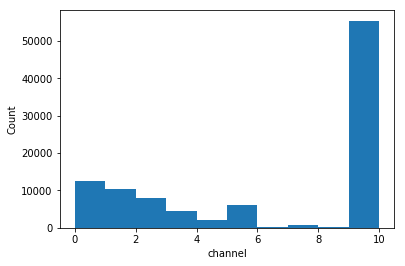

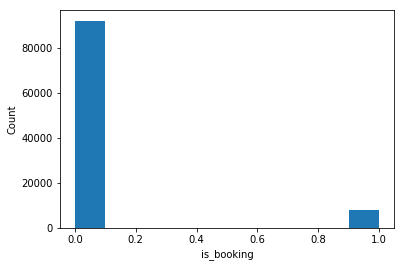

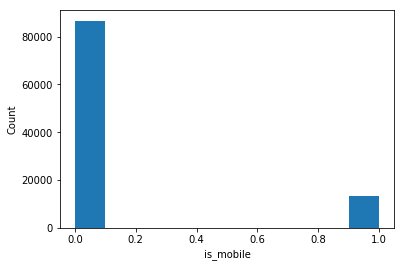

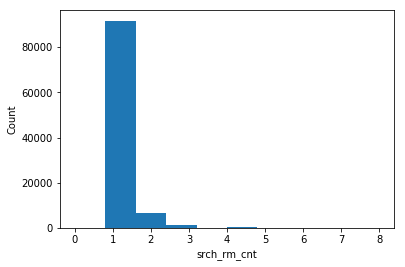

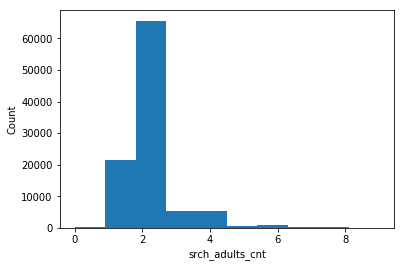

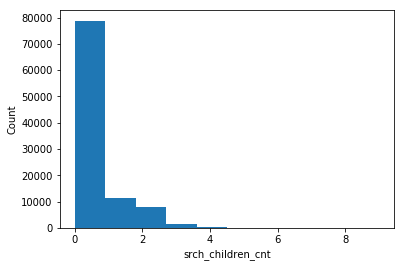

In [111]:
for i in interested_plots:

    plt.hist(dataset[i])
    plt.ylabel('Count')
    plt.xlabel(i)
    plt.show()

##### Comments:

##### 1) Channel 10 has a big exposure to the clientele of Ypedia

##### 2) The low booking rate among the clientele exposed to Ypedia marketing is worrying

##### 3) There is a low utilization of the mobile app in creating booking

##### 4) Most commonly, amongst those who book, the preference setup for booking is 1 room for 2 adults and 0 children

In [146]:
my_tab = pd.crosstab(index=dataset['is_booking'], columns="count")
my_tab

col_0,count
is_booking,
0,92007
1,7993


In [145]:
dataset['user_id'].nunique()

88863

In [142]:
dataset.groupby('user_id')['is_booking'].agg(['count']).reset_index().groupby('count')['user_id'].agg('count')

count
1    79189
2     8423
3     1065
4      161
5       24
6        1
Name: user_id, dtype: int64

##### Comments:

##### 1) There are a total of 88,863 unique users in this dataset.

##### 2) Out of which, 79189 users appeared once. 8423 users appeared twice, 1065 users appeared thrice and so on.

##### 3) By multiplying the users with the number of appearance, we will get back the original 100,000 data rows.

In [141]:
dataset.groupby('user_id')['is_booking'].agg(['mean']).reset_index().groupby('mean').agg('count')

,user_id
mean,
0.000000,80991
0.200000,5
0.250000,35
0.333333,153
0.400000,1
0.500000,1054
0.600000,1
0.666667,26
0.750000,1


##### Comments:

##### 1) Rather than looking at it from the number of instances, by taking the mean value, we are able to find the booking rates.

##### 2) 80991 users did not book any at all.

##### 3) We would expect that in total 7993 bookings were done, and some were done multiple times.

## Data Correction

### Correcting for booking of 0 room size

In [153]:
book_0 = pd.crosstab(dataset['srch_rm_cnt'], dataset['is_booking'])
book_0

is_booking,0,1
srch_rm_cnt,,
0,0,1
1,84425,7248
2,6091,580
3,975,102
4,253,42
5,108,9
6,61,6
7,29,1
8,65,4


In [154]:
dataset = dataset[dataset.srch_rm_cnt != 0]

### Check-in Date > Booking Date

In [174]:
dataset.loc[:,'srch_ci'] = pd.to_datetime(dataset.loc[:,'srch_ci'], format = '%Y-%m-%d')

/Users/Weiyang/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
